# camemberts

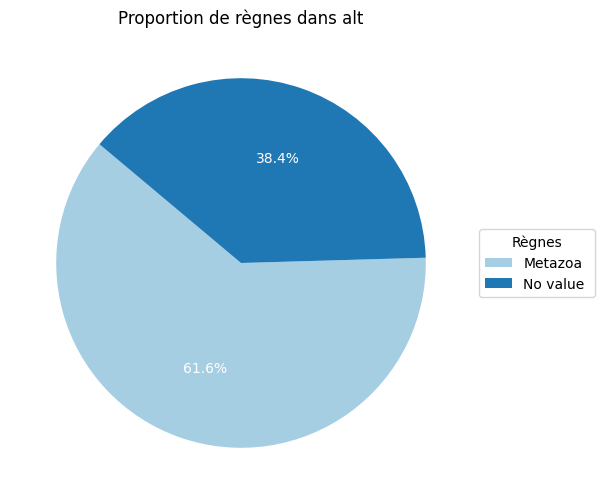

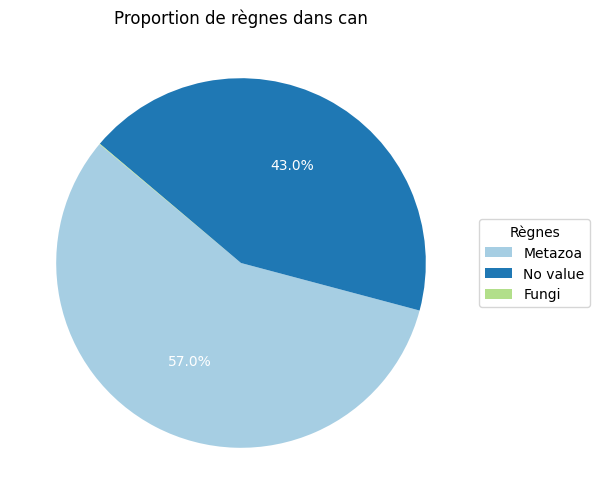

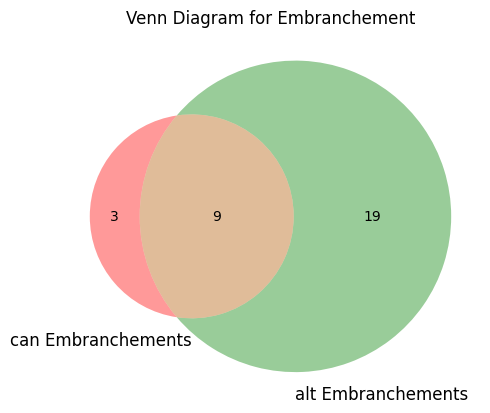

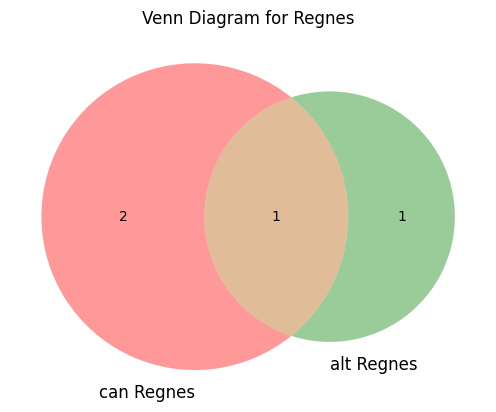

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

gene_name = "ENSG00000107643/"
GENE = "DATA/" + gene_name
file_path_original = GENE + "inter/scores_ali_can_updated.csv"
file_path_alternative = GENE + "inter/scores_ali_alt_updated.csv"
df_original = pd.read_csv(file_path_original)
df_alternative = pd.read_csv(file_path_alternative)

counts_alt = df_alternative['Regne'].value_counts()
counts_o = df_original['Regne'].value_counts()

plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(counts_alt)))
wedges, texts, autotexts = plt.pie(
    counts_alt, 
    autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 5 else '',
    textprops=dict(color="w"),
    colors=colors,
    startangle=140,
)
plt.legend(wedges, counts_alt.index, title="Règnes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Proportion de règnes dans alt')
plt.show()

plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(counts_o)))
wedges, texts, autotexts = plt.pie(
    counts_o, 
    autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 5 else '',
    textprops=dict(color="w"),
    colors=colors,
    startangle=140,
)
plt.legend(wedges, counts_o.index, title="Règnes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Proportion de règnes dans can')
plt.show()




common_classes = set(df_original['Class']).intersection(set(df_alternative['Class']))
common_regnes = set(df_original['Regne']).intersection(set(df_alternative['Regne']))


venn2(subsets=(len(set(df_original['Class'])) - len(common_classes),
               len(set(df_alternative['Class'])) - len(common_classes),
               len(common_classes)),
      set_labels=('can Embranchements', 'alt Embranchements'))

plt.title('Venn Diagram for Embranchement')
plt.show()

venn2(subsets=(len(set(df_original['Regne'])) - len(common_regnes),
               len(set(df_alternative['Regne'])) - len(common_regnes),
               len(common_regnes)),
      set_labels=('can Regnes', 'alt Regnes'))

plt.title('Venn Diagram for Regnes')
plt.show()






# SCATTER PLOT

## Class

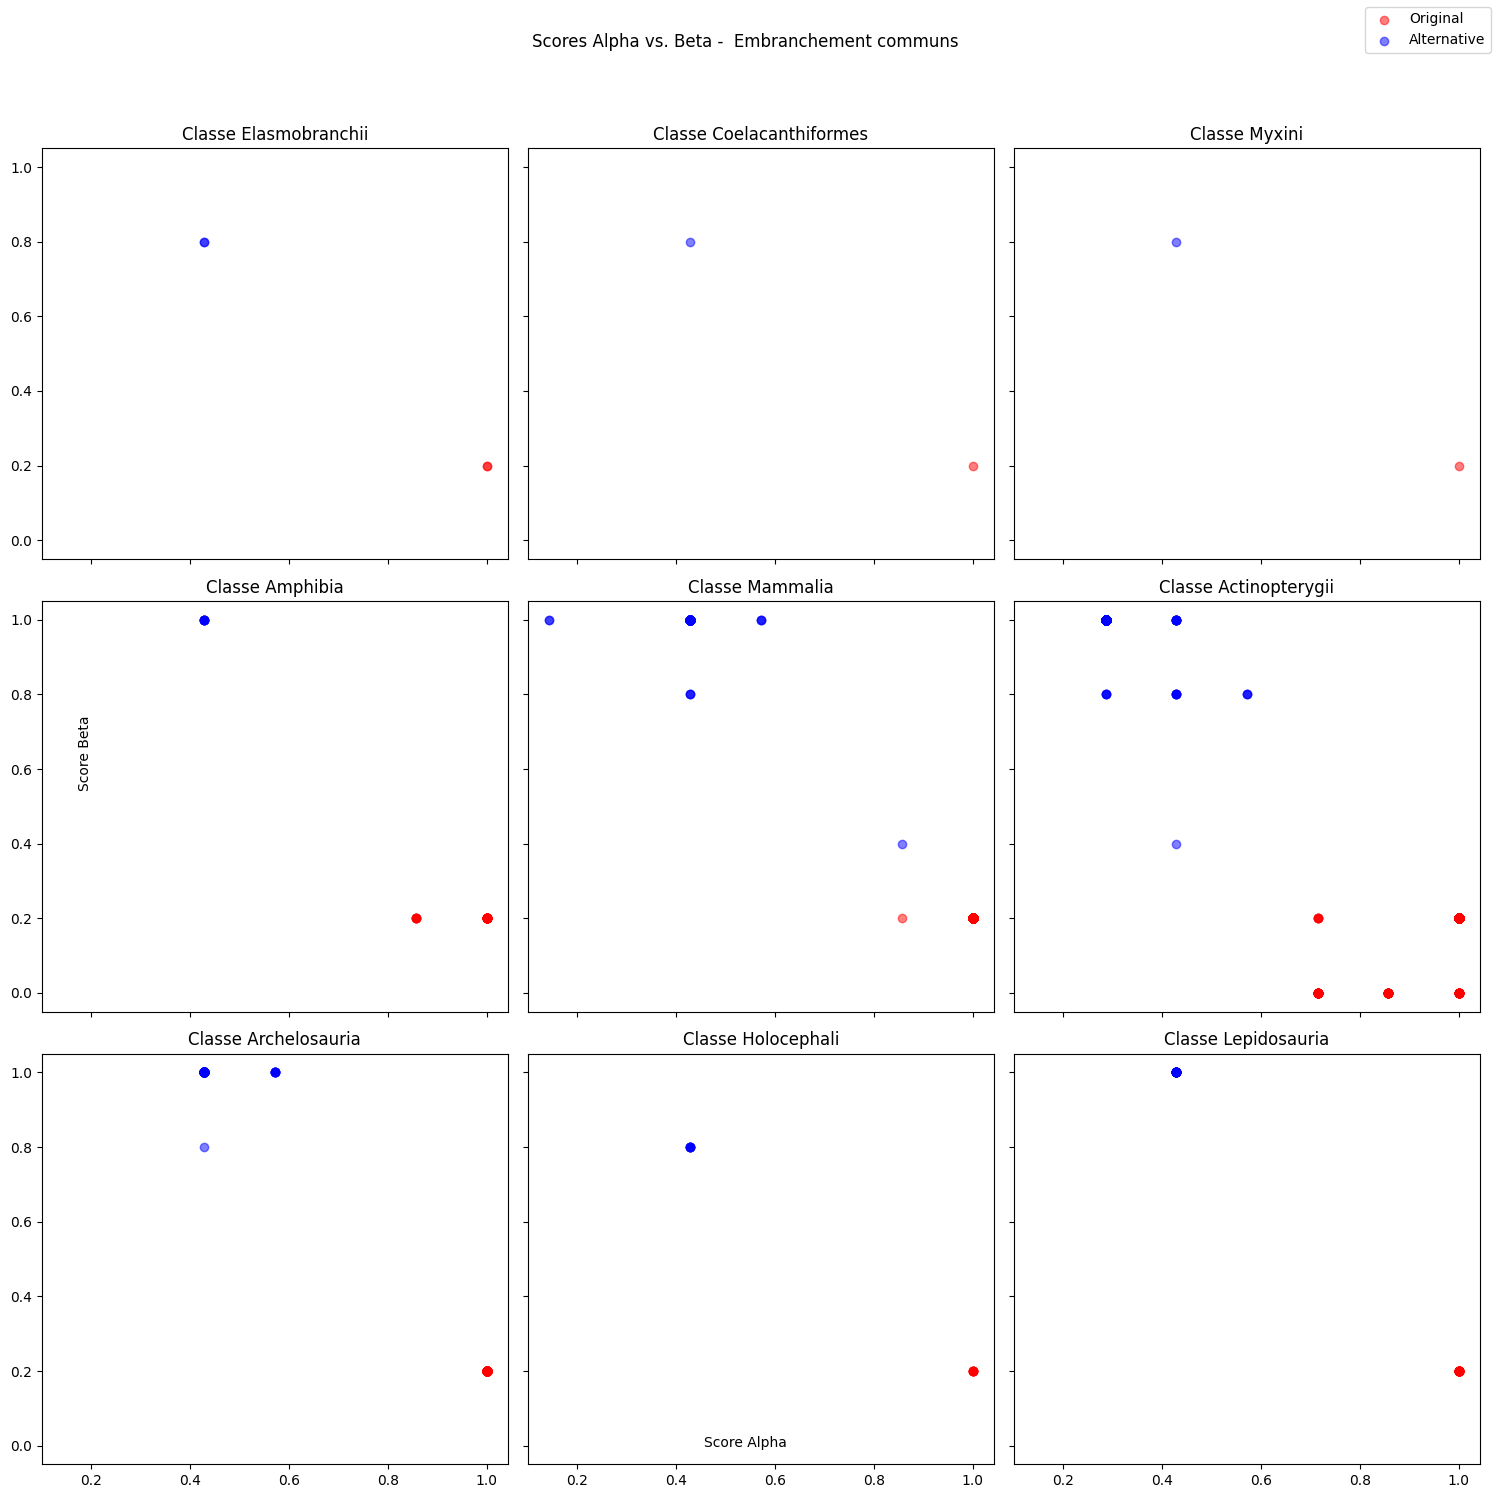

In [7]:

num_classes = len(common_classes)
num_columns = 3
num_rows = -(-num_classes // num_columns)  

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows), sharex=True, sharey=True)

for i, classe in enumerate(common_classes):
    row = i // num_columns
    col = i % num_columns

    df_original_class = df_original[df_original['Class'] == classe]
    df_alternative_class = df_alternative[df_alternative['Class'] == classe]

    axs[row, col].scatter(df_original_class['alpha'], df_original_class['beta'], label='Original', alpha=0.5, color='red')
    axs[row, col].scatter(df_alternative_class['alpha'], df_alternative_class['beta'], label='Alternative', alpha=0.5, color='blue')

    axs[row, col].set_title(f"Classe {classe}")

# Supprimer les sous-graphiques non utilisés s'il y a un nombre impair de classes
if num_classes % num_columns != 0:
    for j in range(num_classes % num_columns, num_columns):
        fig.delaxes(axs[num_rows - 1, j])

fig.suptitle("Scores Alpha vs. Beta -  Embranchement communs")
fig.text(0.5, 0.04, "Score Alpha", ha="center", va="center")
fig.text(0.06, 0.5, "Score Beta", ha="center", va="center", rotation="vertical")
fig.legend(labels=['Original', 'Alternative'], loc='upper right')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

## Regne

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

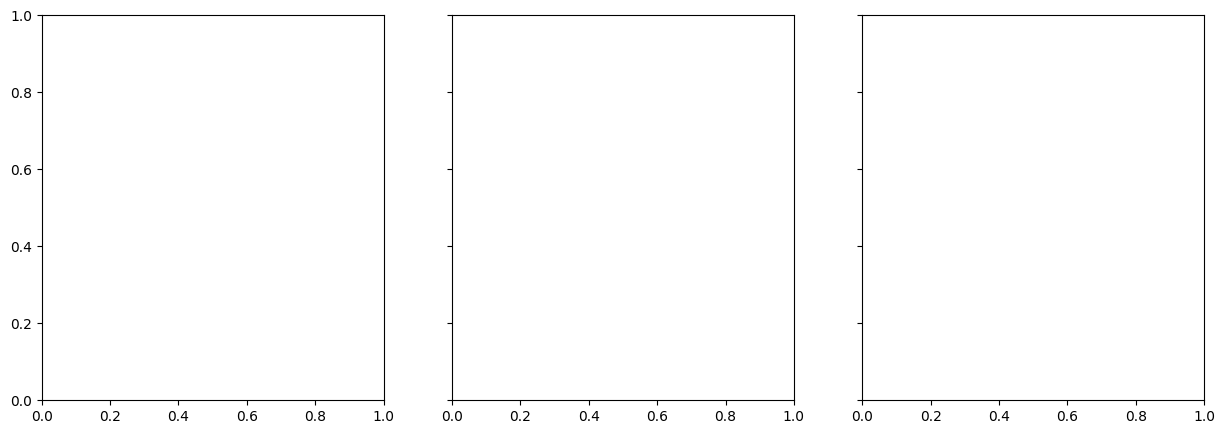

In [8]:

num_regnes = len(common_regnes)
num_columns = 3
num_rows = -(-num_regnes // num_columns)  

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows), sharex=True, sharey=True)

for i, classe in enumerate(common_regnes):
    row = i // num_columns
    col = i % num_columns

    df_original_class = df_original[df_original['Regne'] == classe]
    df_alternative_class = df_alternative[df_alternative['Regne'] == classe]

    axs[row, col].scatter(df_original_class['alpha'], df_original_class['beta'], label='Original', alpha=0.5, color='red')
    axs[row, col].scatter(df_alternative_class['alpha'], df_alternative_class['beta'], label='Alternative', alpha=0.5, color='blue')

    axs[row, col].set_title(f"Classe {classe}")

# Supprimer les sous-graphiques non utilisés s'il y a un nombre impair de classes
if num_regnes % num_columns != 0:
    for j in range(num_regnes % num_columns, num_columns):
        fig.delaxes(axs[num_rows - 1, j])

fig.suptitle("Scores Alpha vs. Beta -  Regne communs")
fig.text(0.5, 0.04, "Score Alpha", ha="center", va="center")
fig.text(0.06, 0.5, "Score Beta", ha="center", va="center", rotation="vertical")
fig.legend(labels=['Original', 'Alternative'], loc='upper right')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

# BAR PLOT PAR SIGNATURE ET MSA

## Class

NameError: name 'np' is not defined

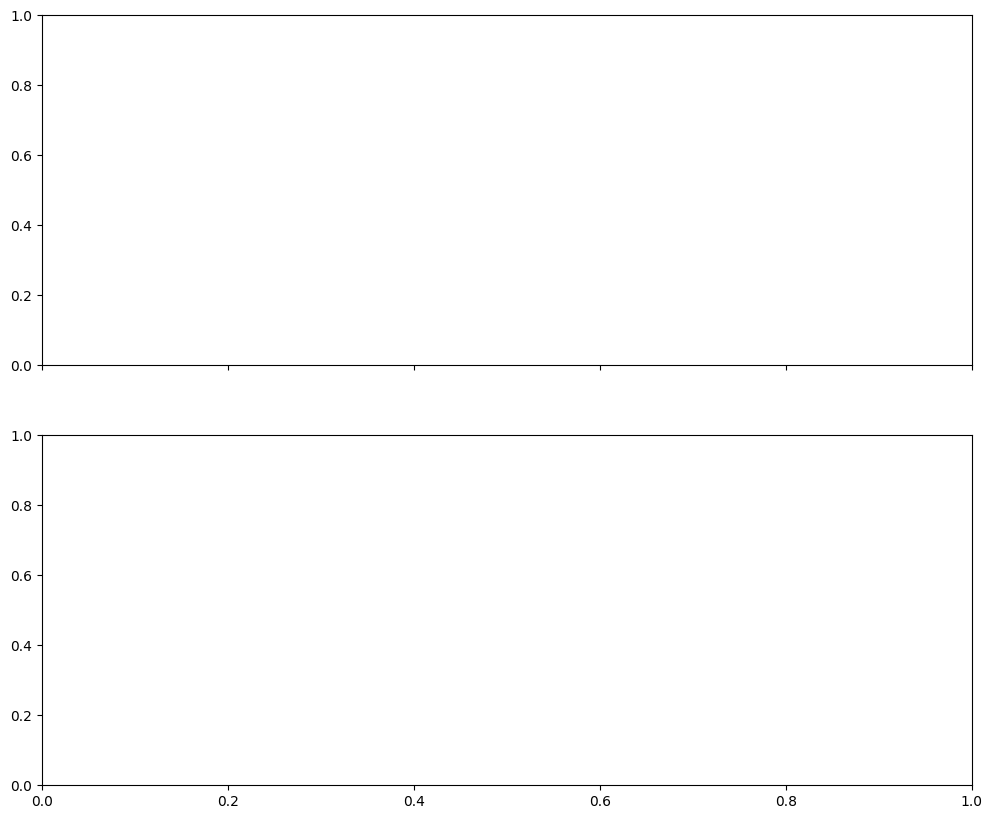

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)


colors = iter(plt.cm.rainbow_r(np.linspace(0, 1, len(common_classes))))

for classe in common_classes:

    df_original_class = df_original[df_original['Class'] == classe]
    df_alternative_class = df_alternative[df_alternative['Class'] == classe]


    color = next(colors)
    ax1.hist(df_original_class['alpha'], bins=20, alpha=0.5, color=color, label=f'Original - Classe {classe}')
    ax1.hist(df_alternative_class['alpha'], bins=20, alpha=0.5, color=color, label=f'Alternative - Classe {classe}', histtype='step', linestyle='dashed')

    ax2.hist(df_original_class['beta'], bins=20, alpha=0.5, color=color, label=f'Original - Classe {classe}')
    ax2.hist(df_alternative_class['beta'], bins=20, alpha=0.5, color=color, label=f'Alternative - Classe {classe}', histtype='step', linestyle='dashed')

ax1.set_title("Bar plot des valeurs Alpha pour chaque Classe (Original vs Alternative)")
ax2.set_title("Bar plot des valeurs Beta pour chaque Classe (Original vs Alternative)")
ax2.set_xlabel("Valeur Beta")
fig.text(0.06, 0.5, "Fréquence", ha="center", va="center", rotation="vertical")  # Label de l'axe y commun

# Placer la légende à l'extérieur du graphique
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuster la mise en page
plt.show()

## Regnes

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)


colors = iter(plt.cm.rainbow_r(np.linspace(0, 1, len(common_classes))))

for classe in common_regnes:

    df_original_class = df_original[df_original['Regne'] == classe]
    df_alternative_class = df_alternative[df_alternative['Regne'] == classe]

    # Tracer les histogrammes pour chaque classe, avec des décalages pour séparer original et alternative
    color = next(colors)
    ax1.hist(df_original_class['alpha'], bins=20, alpha=0.5, color=color, label=f'Original - Regne {classe}')
    ax1.hist(df_alternative_class['alpha'], bins=20, alpha=0.5, color=color, label=f'Alternative - Regne {classe}', histtype='step', linestyle='dashed')

    ax2.hist(df_original_class['beta'], bins=20, alpha=0.5, color=color, label=f'Original - Regne {classe}')
    ax2.hist(df_alternative_class['beta'], bins=20, alpha=0.5, color=color, label=f'Alternative - Regne {classe}', histtype='step', linestyle='dashed')


ax1.set_title("Bar plot des valeurs Alpha pour chaque Regne (Original vs Alternative)")
ax2.set_title("Bar plot des valeurs Beta pour chaque Regne (Original vs Alternative)")
ax2.set_xlabel("Valeur Beta")
fig.text(0.06, 0.5, "Fréquence", ha="center", va="center", rotation="vertical")  # Label de l'axe y commun

# Placer la légende à l'extérieur du graphique
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuster la mise en page
plt.show()

# BAR PLOT PAR SIGNATURE

NameError: name 'np' is not defined

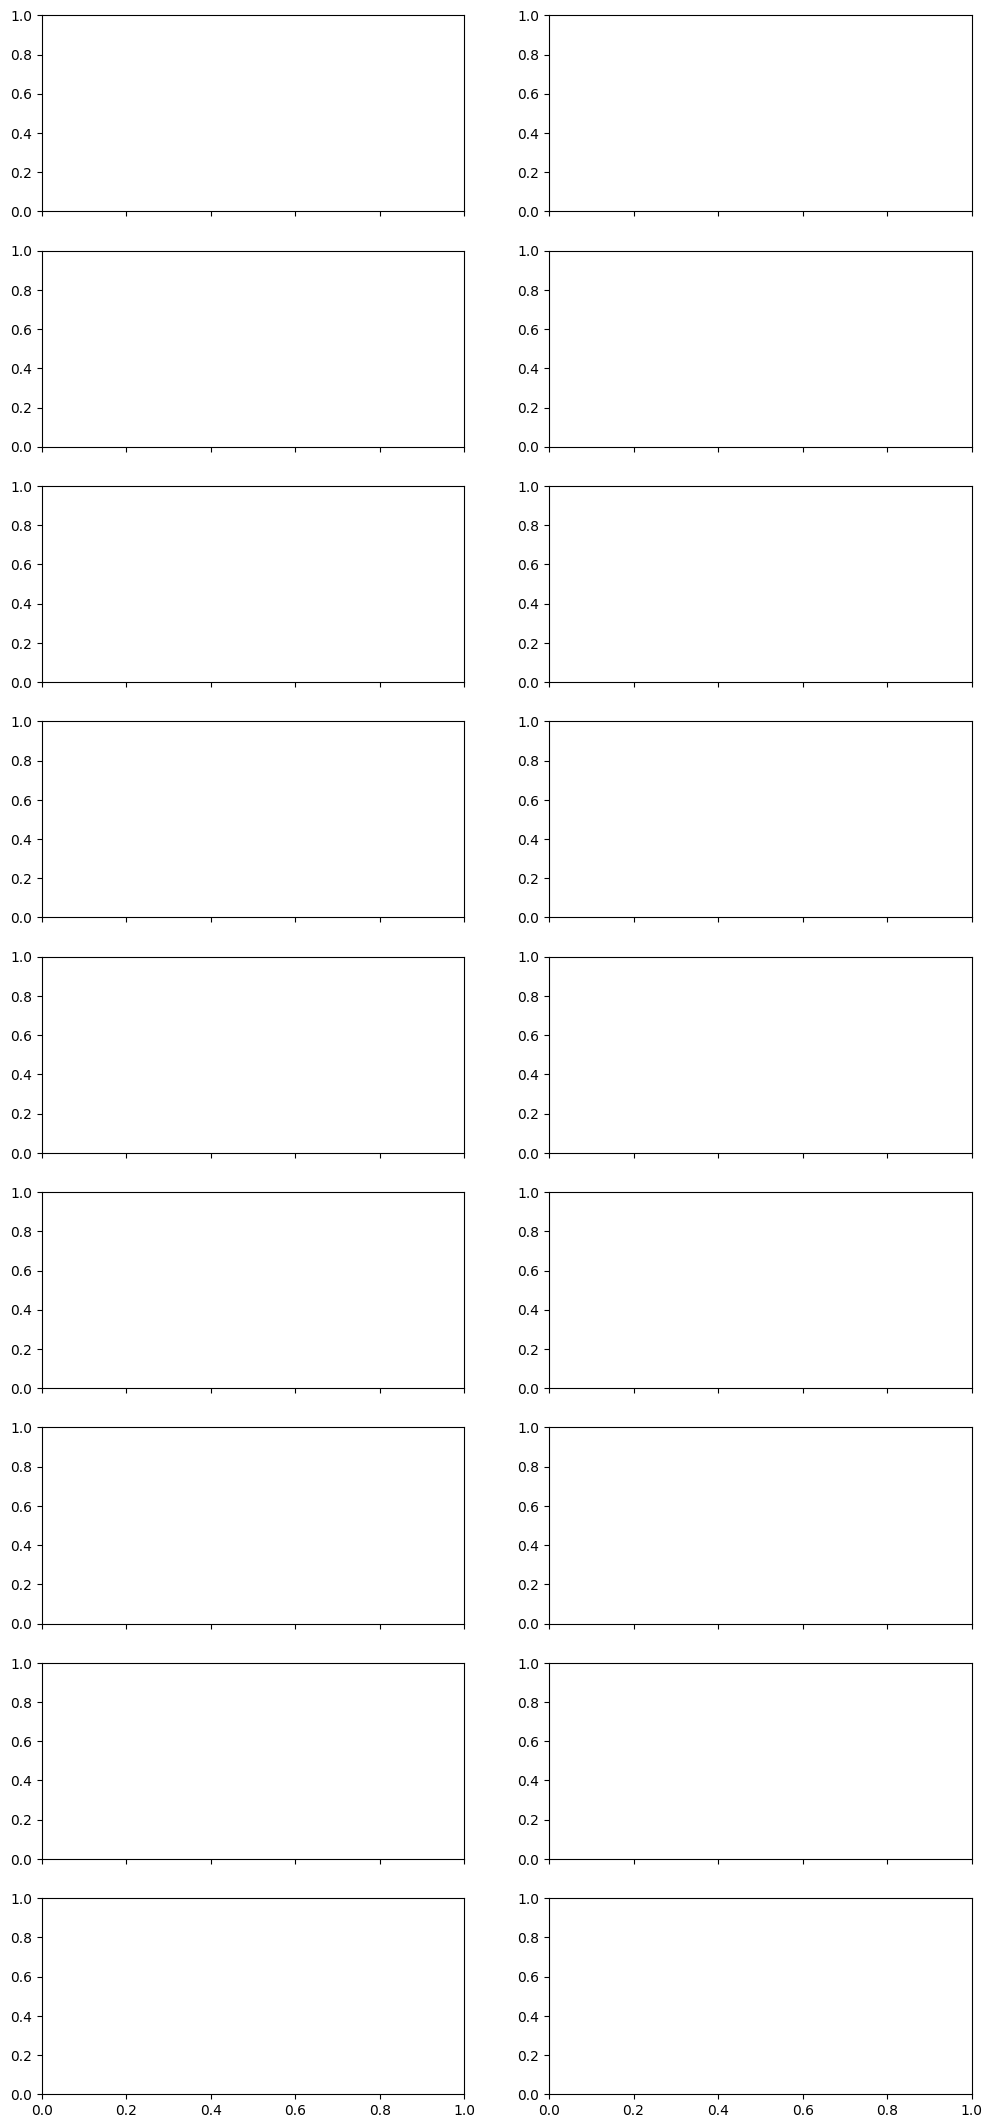

In [10]:
# Créer une seule figure pour tous les histogrammes
fig, axs = plt.subplots(len(common_classes), 2, figsize=(12, 3 * len(common_classes)), sharex=True)


colors = iter(plt.cm.rainbow_r(np.linspace(0, 1, len(common_classes))))

for i, classe in enumerate(common_classes):

    df_original_class = df_original[df_original['Class'] == classe]
    df_alternative_class = df_alternative[df_alternative['Class'] == classe]


    color = next(colors)
    axs[i, 0].hist(df_original_class['alpha'], bins=20, alpha=0.7, color=color, label=f'Original - Classe {classe}')
    axs[i, 1].hist(df_alternative_class['beta'], bins=20, alpha=0.7, color=color, label=f'Alternative - Classe {classe}')


    axs[i, 0].set_title(f'Alpha - Classe {classe}')
    axs[i, 1].set_title(f'Beta - Classe {classe}')

# Ajouter des titres et des légendes à l'extérieur du graphique
plt.suptitle("Histogrammes des valeurs Alpha et Beta pour chaque Classe", y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])


plt.show()